# Bank Customer Churn Prediction Analysis
**Problem definition-** A fictitious bank, serving over 10,000 customers across 3 European countries, is facing a crucial challenge with the customer leaving their business, which has gradually increased over time. The bank objects to address this issue proactively by developing and deploying a predictive model that can identify at-risk customers before they decide to leave. This leads to the enhancement of techniques and strategies for customer retention with low-cost efficiency.

**Project Goal-** The primary objective of this project is to deploy a robust and generalized churn prediction model that helps banks forecast customer churn from both existing and new, unseen data. This will allow the bank to take pointed actions to reduce churn ratios. In addition, the project also aims to understand and disclose the underlying patterns and statistics about factors influencing customer churn. Specifically, will explore relationships between churn and demographic factors for instance age, income, and region. Behavioral factors like the count of products registered by customers, and number of years being as a customer in the bank. 
To achieve these objectives, I will employ a combination of three machine learning algorithms to predict the target variable. Those are a linear model, a non-linear model, and Ensemble methods to optimize the prediction rate. 


## Data Understanding

In [1]:
# Basic libraries for EDA
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
from seaborn import heatmap

# Upsampling library
from imblearn.over_sampling import SMOTE

# modelling
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# validation and evaluation metrics libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# loads dataset
df_train = pd.read_csv(r"C:\Users\naniv\Downloads\UOP\Semester_3\Customer_Analytics\Capstone_project\BankData.csv")
dfm = df_train
dfm.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# dataframe shape
print(f'There are {dfm.shape[0]} rows and {dfm.shape[1]} columns in the dataset')

There are 10000 rows and 14 columns in the dataset


In [4]:
# data types of the attributes
dfm.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# Dataframe information
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# checks duplicates
dupl = dfm[dfm['CustomerId'].duplicated()]
dupl

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [7]:
# checks missing values

dfm.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Set id column as index
#dfm = dfm.set_index('id')
dfm = dfm.set_index('RowNumber')
dfm.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [9]:
# uniqueness of data available 

a = dfm['CustomerId'].nunique()
b = dfm.shape[0]

if a == b:
    print('Each row in the dataframe represents individual customers. Proceed further :)')
else:
    print(' There are duplicate customers in the datase. Please Check!!')

Each row in the dataframe represents individual customers. Proceed further :)


In [10]:
# statistical summary of the dataframe

dfm.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
dfm.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2933,3,2
top,Smith,France,Male
freq,32,5014,5457


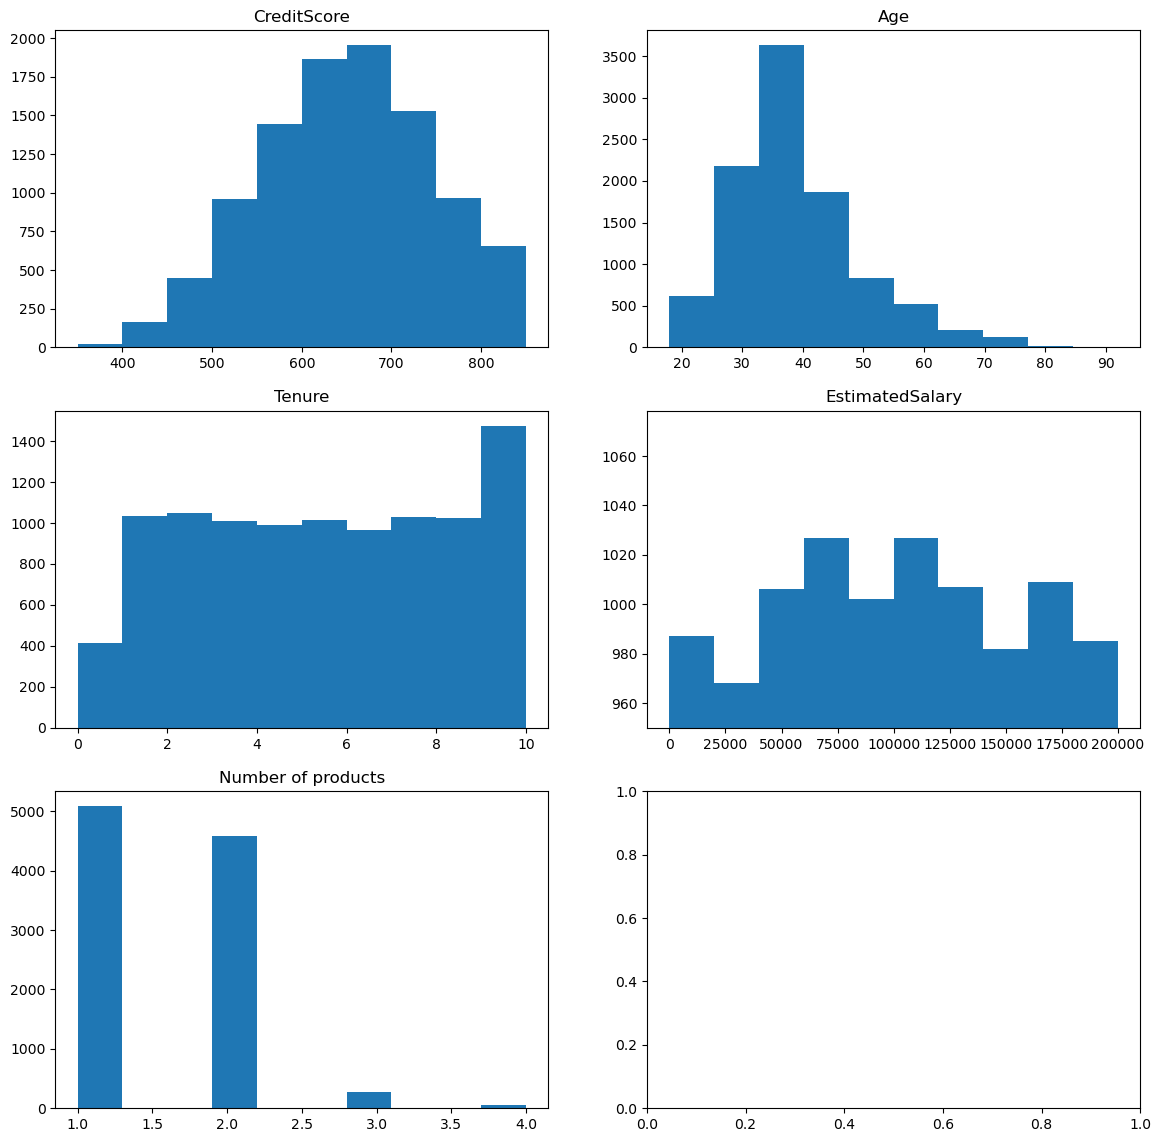

In [12]:
# Data distributions of the numerical variables

fig,ax = plt.subplots(3,2, figsize = (14,14))

ax[0,0].hist(dfm['CreditScore'])
ax[0,0].set_title('CreditScore')
ax[0,1].hist(dfm['Age'])
ax[0,1].set_title('Age')
ax[1,0].hist(dfm['Tenure'])
ax[1,0].set_title('Tenure')
ax[1,1].hist(dfm['EstimatedSalary'])
ax[1,1].set_title('EstimatedSalary')
ax[1,1].set_ylim(950,None)
ax[2,0].hist(dfm['NumOfProducts'])
ax[2,0].set_title('Number of products')
plt.show()

In [13]:
# Ther is class imbalance in target variable 
# class imbalance is common because most of the customer do not leave the service only very few leave bank 
# ratio of target variable is 4:1
#dfm['Exited'].value_counts()[0]
#dfm['Exited'].value_counts()[1]
dfm['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
# percentage of data belonging to minority class
class1per = (dfm['Exited'].value_counts()[1] / dfm.shape[0]) * 100
print(f'Percentage of Minority class {class1per:.2f} %')
# imbalance is moderate and need to be addressed using data mitigation techniques

Percentage of Minority class 20.37 %


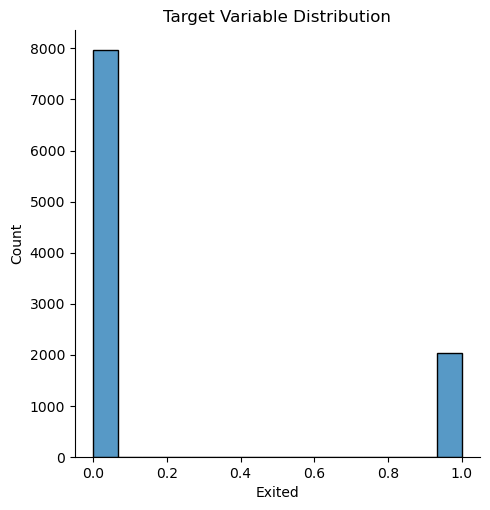

In [15]:
# Target variable distribution
sns.displot(dfm['Exited'])
plt.title('Target Variable Distribution')
plt.show()

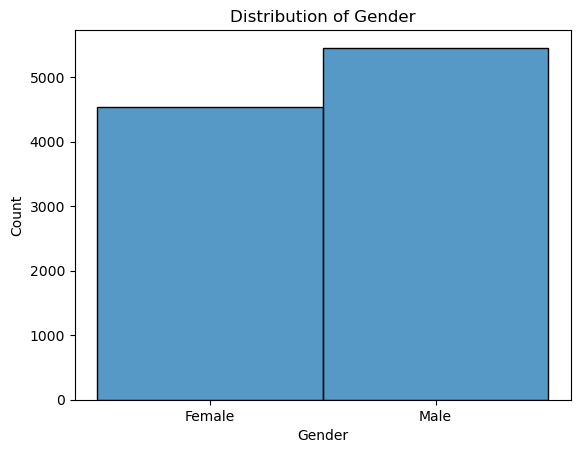

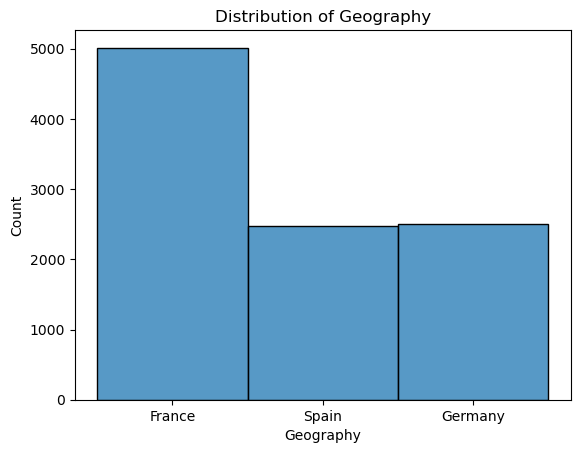

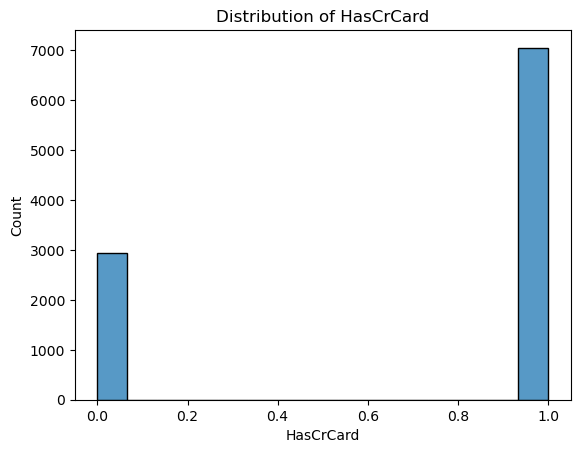

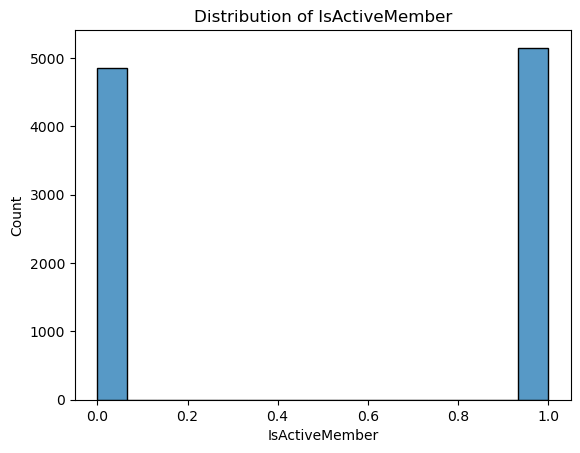

In [16]:
# categorical variables distribution

catcols09 = ['Gender', 'Geography','HasCrCard', 'IsActiveMember']

for i in catcols09:
    sns.histplot(dfm[i])
    plt.title(f'Distribution of {i}')
    plt.show()

In [17]:
# Data validations

catcols09 = ['Gender', 'Geography','HasCrCard', 'IsActiveMember']

for t in catcols09:
    count = dfm[t].value_counts()
    
    unq_valper = count / len(dfm) * 100 
    print(f'Percentage of unique values of column {t}')
    print(unq_valper)
    print('-----------------------------')

Percentage of unique values of column Gender
Male      54.57
Female    45.43
Name: Gender, dtype: float64
-----------------------------
Percentage of unique values of column Geography
France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64
-----------------------------
Percentage of unique values of column HasCrCard
1    70.55
0    29.45
Name: HasCrCard, dtype: float64
-----------------------------
Percentage of unique values of column IsActiveMember
1    51.51
0    48.49
Name: IsActiveMember, dtype: float64
-----------------------------


In [18]:
# Data Validations
numcols09 = ['CreditScore', 'Age','Tenure', 'NumOfProducts','Balance','EstimatedSalary' ]

for m in numcols09:
    count = dfm[m].value_counts()
    
    unq_valper = (count / len(dfm) * 100 ).nlargest(3)
    print(f'Percentage of unique values of column {m}')
    print(unq_valper)
    print('-----------------------------')

Percentage of unique values of column CreditScore
850    2.33
678    0.63
655    0.54
Name: CreditScore, dtype: float64
-----------------------------
Percentage of unique values of column Age
37    4.78
38    4.77
35    4.74
Name: Age, dtype: float64
-----------------------------
Percentage of unique values of column Tenure
2    10.48
1    10.35
7    10.28
Name: Tenure, dtype: float64
-----------------------------
Percentage of unique values of column NumOfProducts
1    50.84
2    45.90
3     2.66
Name: NumOfProducts, dtype: float64
-----------------------------
Percentage of unique values of column Balance
0.00         36.17
130170.82     0.02
105473.74     0.02
Name: Balance, dtype: float64
-----------------------------
Percentage of unique values of column EstimatedSalary
24924.92     0.02
101348.88    0.01
55313.44     0.01
Name: EstimatedSalary, dtype: float64
-----------------------------


## Exploratory Data Analysis

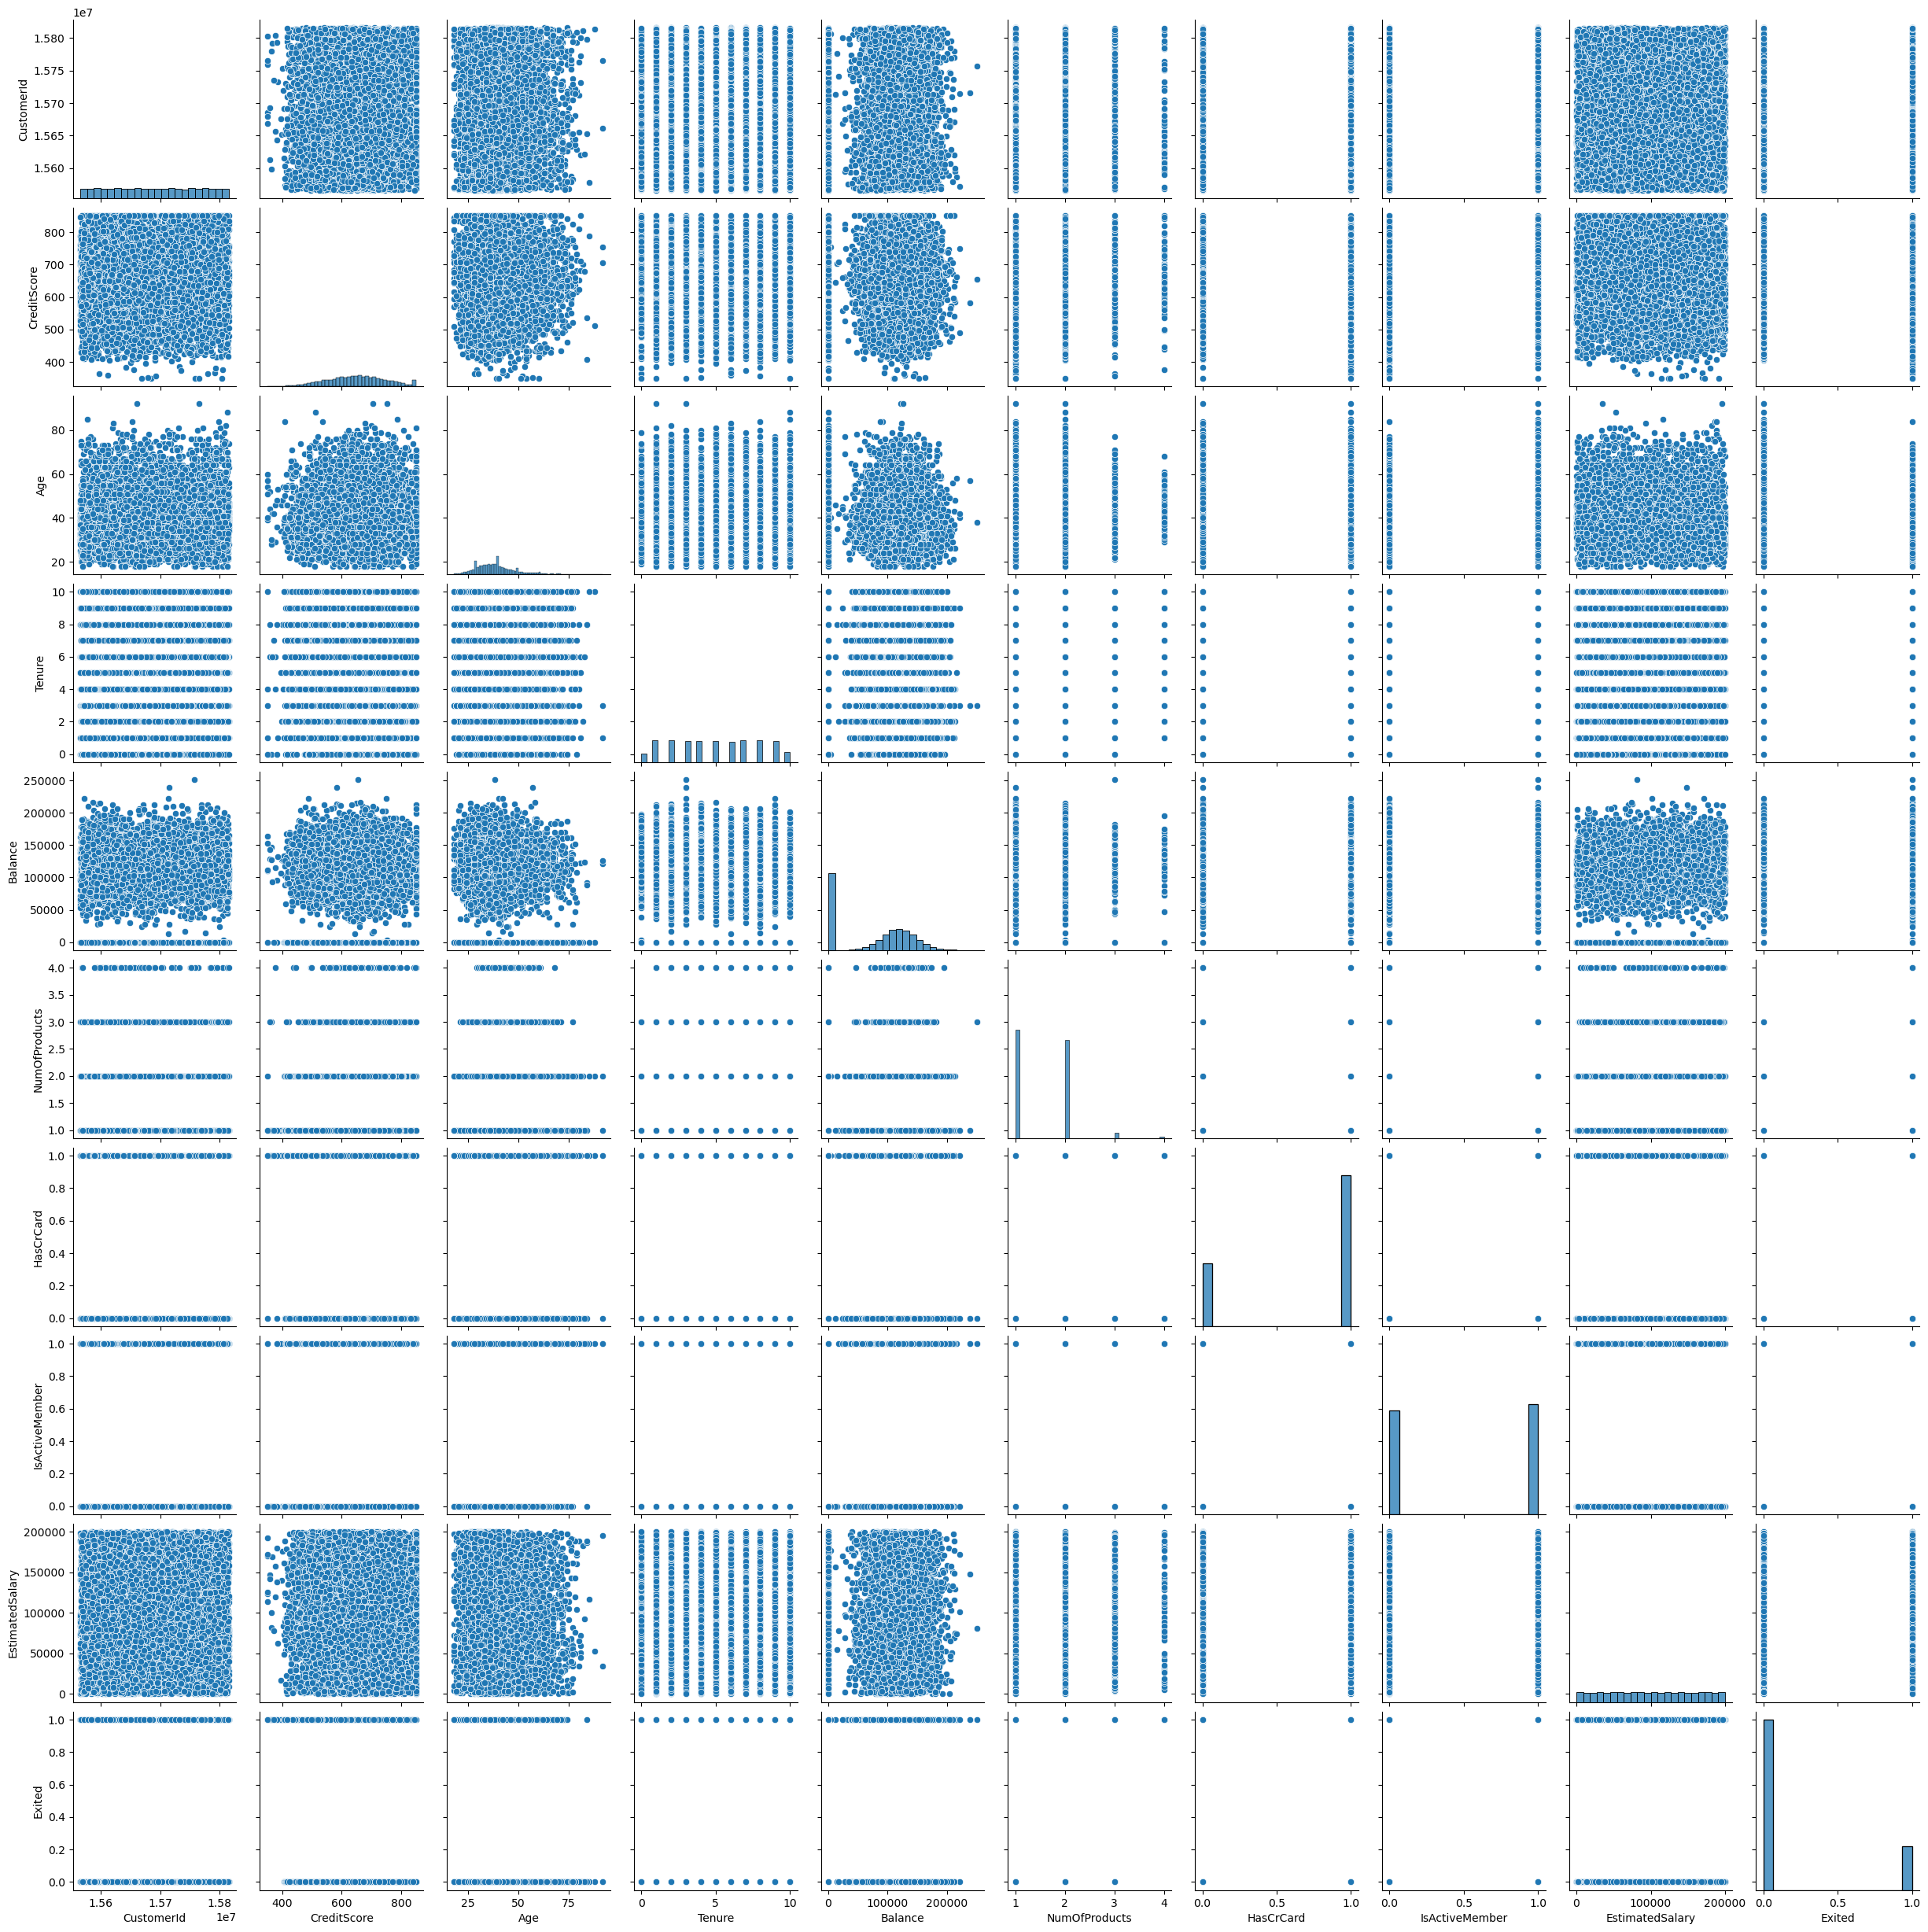

In [19]:
# pair plot for correlation

sns.pairplot(dfm)
plt.show()

In [20]:
# correlation between features
# using spearman Method
corr11 = dfm.corr()
corr11


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


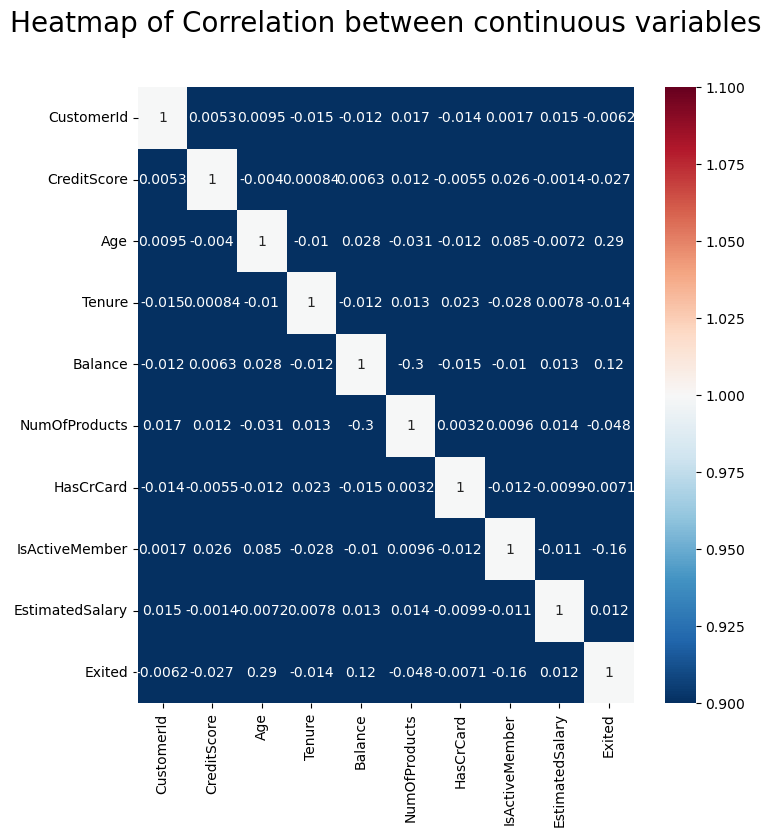

In [21]:
# visual representation of correlation

fig, ax = plt.subplots(figsize = (8,8))
ax = heatmap(
corr11,
annot = True,
ax = ax,
cmap = "RdBu_r",
vmin = 1,
vmax = 1,
)
fontdict = { 'fontsize': 20}
ax.set_title("Heatmap of Correlation between continuous variables", fontdict= fontdict, pad =40)
plt.show()


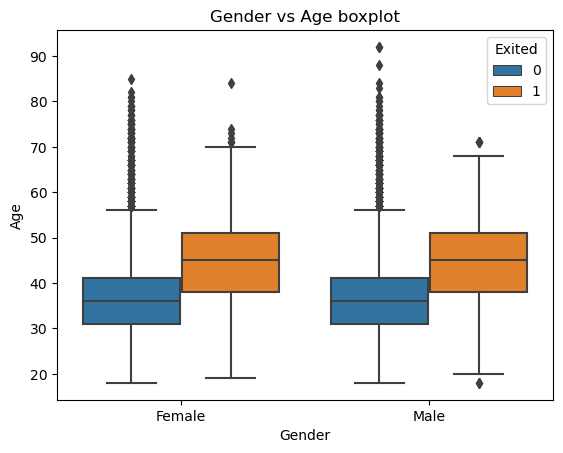

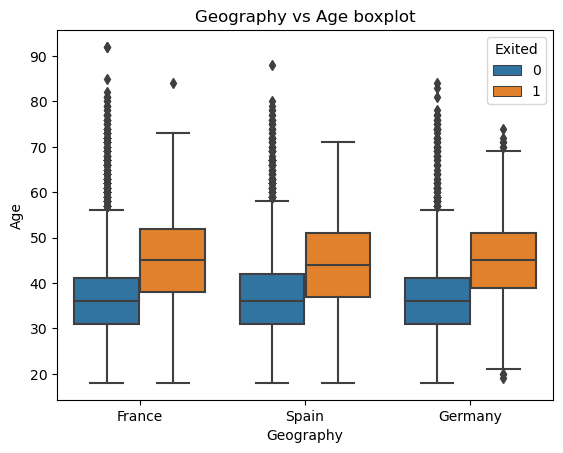

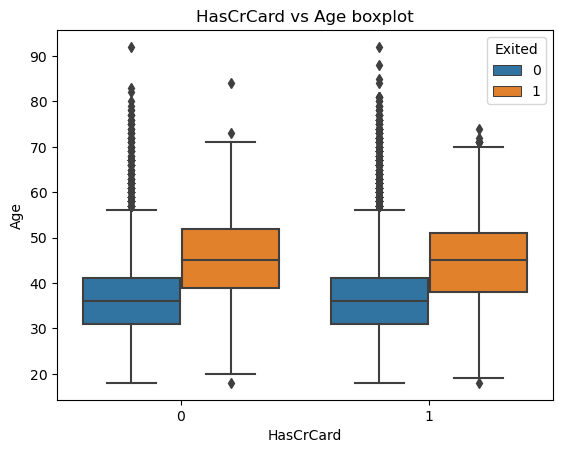

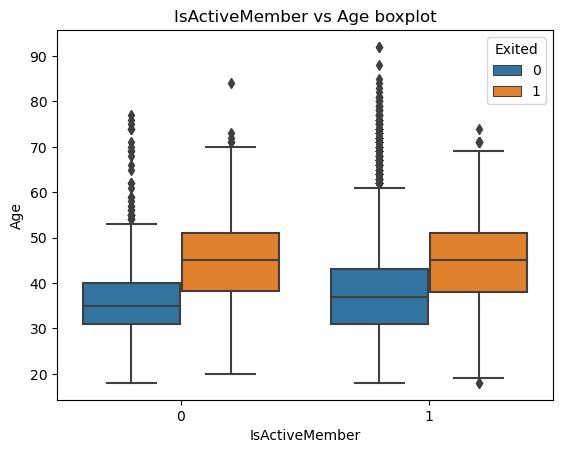

In [22]:
#age has highest correlation with target variable
# lets look in to patterns of age vs cat variable by exited or not


for i in catcols09:
    sns.boxplot(data = dfm, x = dfm[i], y = 'Age', hue = 'Exited')
    plt.title(f'{i} vs Age boxplot' )
    plt.show()
    pass

In [23]:
# skewness values to check data is skewed or not
print(dfm.skew(numeric_only = True)) #threshold -1 to 1 
# Age column is right skewed because life expectancy of european regions france, spain and germany is less than 84 since older are less represented and younger customers are more in dataset

CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64


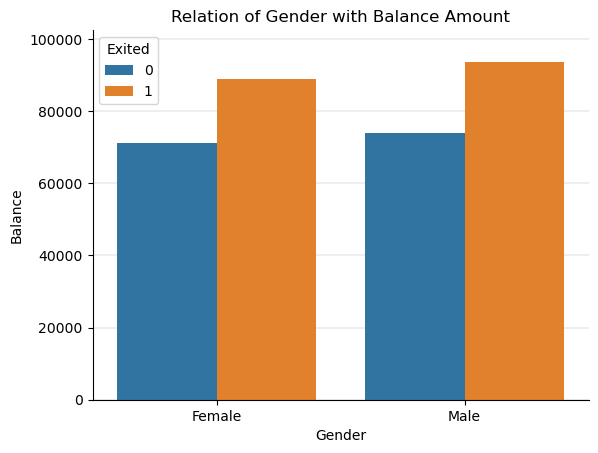

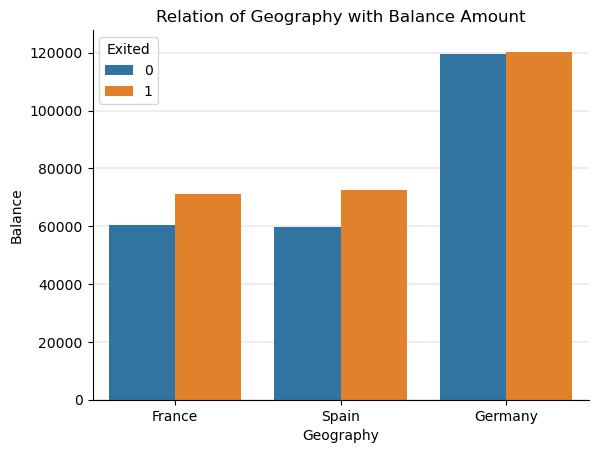

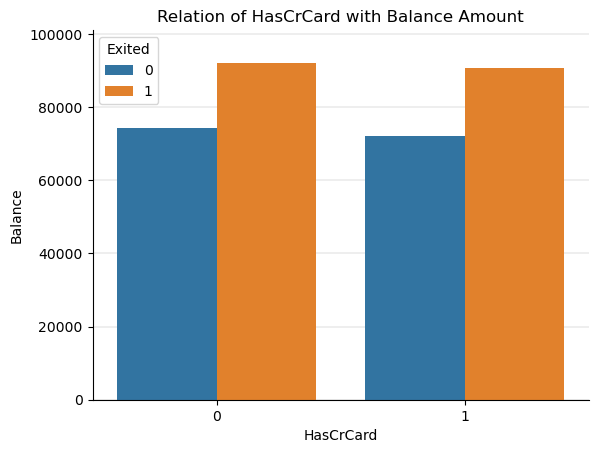

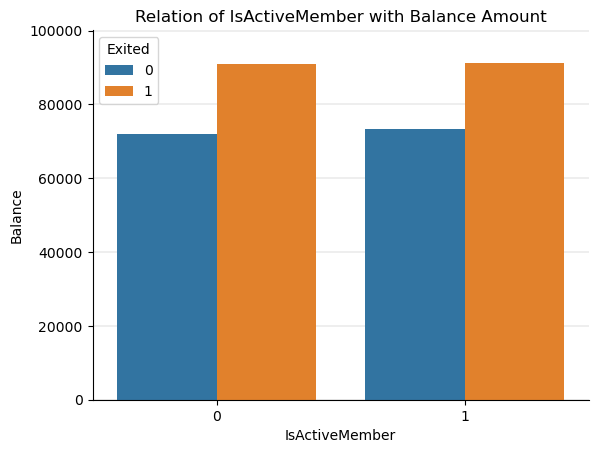

In [24]:
# Count plot comparing balance wtih cat cols by Exited
borders = ['top','right']
for i in catcols09:
    ax = sns.barplot(data = dfm, x = dfm[i], y = 'Balance', hue = 'Exited',errwidth = 0)
    for j in borders:
        ax.spines[j].set_visible(False) # removes borders 
    ax.grid(True,which= 'major', axis = 'y', linestyle= '-',linewidth = 0.3,zorder = 0) # set gridlines
    ax.set_axisbelow(True) # overlay bars from the gridlines
    ax.set_title(f'Relation of {i} with Balance Amount')
    plt.show()

In [25]:
# Validating findings in visualizations with acutal numbers 
#customer exited or not of average balance
amnt0 = np.mean(dfm[dfm['Exited']==0]['Balance'])
amnt1 = np.mean(dfm[dfm['Exited']== 1]['Balance'])
print(f'Customer exited from Bank having average balance of {np.round(amnt0)} \ncustomers stayed loyal with bank having average balance of {np.round(amnt1 )}')

Customer exited from Bank having average balance of 72745.0 
customers stayed loyal with bank having average balance of 91109.0


In [26]:
#Checks count of customers exited and not exited using number of products

prod0=dfm[dfm['Exited'] == 0] ['NumOfProducts']
prod1 = dfm[dfm['Exited']== 1] ['NumOfProducts']

print('Customers using Number of products Not exited')
print('--' * 20)
print(prod0.value_counts())

print('--' * 30)

print('Customers using Number of products Exited')
print('--' * 20)
print(prod1.value_counts())

Customers using Number of products Not exited
----------------------------------------
2    4242
1    3675
3      46
Name: NumOfProducts, dtype: int64
------------------------------------------------------------
Customers using Number of products Exited
----------------------------------------
1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64


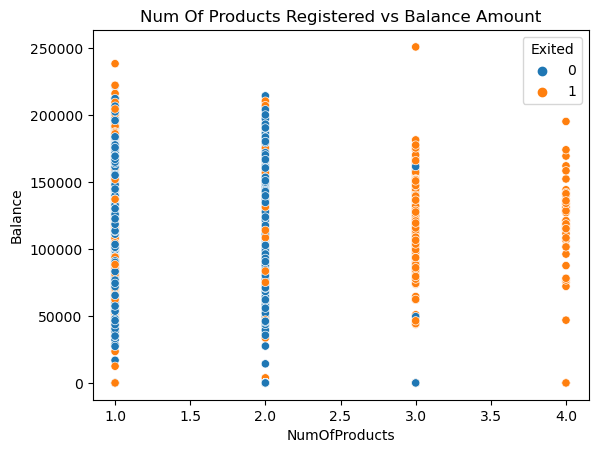

In [27]:
# visualize to support above results
#negatively correlated num of products vs balance in bank account
sns.scatterplot(data = dfm, x ='NumOfProducts',y= 'Balance', hue ='Exited')
plt.title('Num Of Products Registered vs Balance Amount')
plt.show()

In [69]:
# customers exited with less than average balance
 
countbal = (dfm['Balance'] <= np.mean(dfm['Balance'])) & (dfm['Exited'] == 1 )
countbal.value_counts()

print(f'Number of Customers having less than average balance Exited the bank are {countbal.value_counts()[1]}' )

Number of Customers having less than average balance Exited the bank are 611


## Data Preparation & Modelling

In [28]:
# there are no duplicates and no missing values
# Data cleaning
cleaned_dfm = dfm.drop(labels = ['CustomerId', 'Surname'], axis = 1)

In [29]:
# encoding categorical features
df_encoded= pd.get_dummies(cleaned_dfm, drop_first = True)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [30]:
X1 = df_encoded.drop(labels = ['Exited'], axis = 1) 
y1 = df_encoded['Exited']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size = 0.30, random_state = 42, stratify = y1)
# stratify balance the imbalance data


In [31]:
# scaling data
scaler = StandardScaler(with_mean = True)

X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [32]:
# Baseline model performance 


algorithms = {"logistic Regression": LogisticRegression(),
       "Decision Tree": DecisionTreeClassifier(),
       "Random Forest Classifier": RandomForestClassifier()} # dictinory of supervised models


for key , algo in algorithms.items():
    
    #fits the data in to the model
    algo.fit(X_train1, y_train1)
    
    #Prediction
    prediction = algo.predict(X_test1)
    
    #accuracy 
    acc = accuracy_score(y_test1, prediction)
    print(f'Accuracy of {key} {acc:.2f} ')
    
    #Classification Report 
    report = classification_report(y_test1, prediction,zero_division=0)
    print(f'Classification Report of  {key}')
    print(report)
    
    
    #confusion matrix 
    conf_mtrx = confusion_matrix(y_test1, prediction)
    print(f"Confusion Matrix {key}:")
    print(conf_mtrx)
    print('--------------------------------------------------------------')

Accuracy of logistic Regression 0.81 
Classification Report of  logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000

Confusion Matrix logistic Regression:
[[2318   71]
 [ 491  120]]
--------------------------------------------------------------
Accuracy of Decision Tree 0.79 
Classification Report of  Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2389
           1       0.49      0.50      0.49       611

    accuracy                           0.79      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.79      0.79      0.79      3000

Confusion Matrix Decision Tree:
[[2068  321]
 [ 306  305]]
---

## Model Evaluation

In [46]:
# k fold  cross validation
# used for model who have class imbalance in dataset

kf = KFold(n_splits = 5)
kf.get_n_splits(X1)

print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [47]:
for key, algo in algorithms.items():
    kfoldscores = cross_val_score(algo, X_train1,y_train1 , cv = kf)
    print(f'kfold Cross validation of {key} {kfoldscores}')
    print('*************************')
    print(f'Kfold cross validation score mean {kfoldscores.mean()}')
    print('--------------------------------------------')

kfold Cross validation of logistic Regression [0.78642857 0.81714286 0.83928571 0.79714286 0.80785714]
*************************
Kfold cross validation score mean 0.8095714285714287
--------------------------------------------
kfold Cross validation of Decision Tree [0.76642857 0.78785714 0.78571429 0.795      0.78928571]
*************************
Kfold cross validation score mean 0.7848571428571428
--------------------------------------------
kfold Cross validation of Random Forest Classifier [0.83785714 0.86       0.87285714 0.84571429 0.85928571]
*************************
Kfold cross validation score mean 0.8551428571428572
--------------------------------------------


In [48]:
# Upsampling distributions using SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors= 5)

x_resamp , y_resamp = sm.fit_resample(X1,y1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(x_resamp,y_resamp, test_size = 0.30, random_state = 42, stratify = y_resamp)


X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [49]:
# checks classes counts after upsampling and compares it with count of before upsampling
y_resamp.value_counts(), y1.value_counts()

(1    7963
 0    7963
 Name: Exited, dtype: int64,
 0    7963
 1    2037
 Name: Exited, dtype: int64)

In [50]:
# model performance after upsampling target variable

algorithms = {"logistic Regression": LogisticRegression(),
       "Decision Tree": DecisionTreeClassifier(),
       "Random Forest Classifier": RandomForestClassifier()}


for key , algo in algorithms.items():
    
    #fits the data in to the model
    algo.fit(X_train2, y_train2)
    
    #Prediction
    prediction = algo.predict(X_test2)
    
    #accuracy 
    acc = accuracy_score(y_test2, prediction)
    print(f'Accuracy of {key} {acc:.2f} ')
    
    #Classification Report 
    report = classification_report(y_test2, prediction,zero_division=0)
    print(f'Classification Report of  {key}')
    print(report)
    
    
    #confusion matrix 
    conf_mtrx = confusion_matrix(y_test2, prediction)
    print(f"Confusion Matrix {key}:")
    print(conf_mtrx)
    print('--------------------------------------------------------------')

Accuracy of logistic Regression 0.79 
Classification Report of  logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2389
           1       0.78      0.79      0.79      2389

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778

Confusion Matrix logistic Regression:
[[1863  526]
 [ 492 1897]]
--------------------------------------------------------------
Accuracy of Decision Tree 0.79 
Classification Report of  Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2389
           1       0.78      0.80      0.79      2389

    accuracy                           0.79      4778
   macro avg       0.79      0.79      0.79      4778
weighted avg       0.79      0.79      0.79      4778

Confusion Matrix Decision Tree:
[[1867  522]
 [ 489 1900]]
---

In [51]:
# best model evaluation metrics and confusion matrix

randforest = RandomForestClassifier()

randforest.fit(X_train2, y_train2)

prediction= randforest.predict(X_test2)

acc = accuracy_score(y_test2, prediction)
print(f'Accuracy {acc:.2f} ')

clf_report =  classification_report(y_test2, prediction)
print(f'Classification Report')
print(clf_report)

confu_matrix = confusion_matrix(y_test2, prediction)
print('Confusion Matrix')
print(confu_matrix)

Accuracy 0.86 
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2389
           1       0.86      0.86      0.86      2389

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778

Confusion Matrix
[[2048  341]
 [ 346 2043]]


In [52]:
for key, algo in algorithms.items():
    kfoldscores = cross_val_score(algo, X_train2,y_train2 , cv = 5)
    print(f'kfold Cross validation of {key} {kfoldscores}')
    print('*************************')
    print(f'Kfold cross validation score mean {kfoldscores.mean()}')
    print('--------------------------------------------')

kfold Cross validation of logistic Regression [0.77578475 0.78295964 0.78520179 0.76895469 0.76985195]
*************************
Kfold cross validation score mean 0.7765505656179146
--------------------------------------------
kfold Cross validation of Decision Tree [0.78251121 0.78878924 0.7838565  0.77747869 0.78375953]
*************************
Kfold cross validation score mean 0.7832790348182438
--------------------------------------------
kfold Cross validation of Random Forest Classifier [0.84394619 0.85336323 0.86143498 0.8470166  0.85060565]
*************************
Kfold cross validation score mean 0.851273329349967
--------------------------------------------


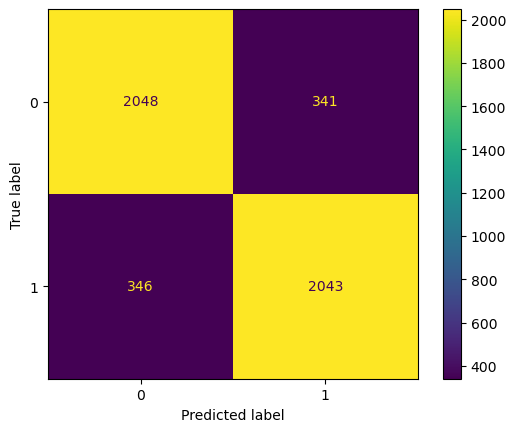

In [54]:
# visualize confusion matrix

cm_display = ConfusionMatrixDisplay(confusion_matrix = confu_matrix, display_labels = randforest.classes_)

cm_display.plot()

plt.show()

In [72]:
# Based on the f1 score and cross validation score considered random forest classifier as final model
# Feature importances for the final model

randforest = RandomForestClassifier()

randforest.fit(X_train2, y_train2)

print('Feature importances for Model Random Forest Classifier')
print('------------------------------------------------------')
for col , val in sorted(
    zip(X1.columns, 
       randforest.feature_importances_,
       ),
    key = lambda x: x[1],
    reverse = True,
    ):
    print(f'{col:15}{val:10.3f}')


Feature importances for Model Random Forest Classifier
------------------------------------------------------
Age                 0.226
EstimatedSalary     0.123
Balance             0.119
CreditScore         0.115
IsActiveMember      0.108
NumOfProducts       0.103
Tenure              0.071
Gender_Male         0.068
Geography_Spain     0.030
HasCrCard           0.022
Geography_Germany     0.014


In [71]:
# roc auc score
rocauc = roc_auc_score(y_test2, prediction)
rocauc

0.8562159899539556

**References**


https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset
https://creativecommons.org/licenses/by-nc-sa/4.0/
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html
https://en.wikipedia.org/wiki/List_of_European_countries_by_life_expectancya
https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
https://medium.com/@rithpansanga/choosing-the-right-size-a-look-at-the-differences-between-upsampling-and-downsampling-methods-daae83915c19#:~:text=If%20the%20focus%20is%20on,may%20be%20a%20better%20option.
https://youtu.be/4SivdTLIwHc?feature=shared
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
https://www.geeksforgeeks.org/spearmans-rank-correlation/
https://aws.amazon.com/what-is/data-preparation/
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html
https://www.datacamp.com/tutorial/understanding-logistic-regression-python
https://www.ibm.com/topics/decision-trees
https://www.ibm.com/topics/random-forest